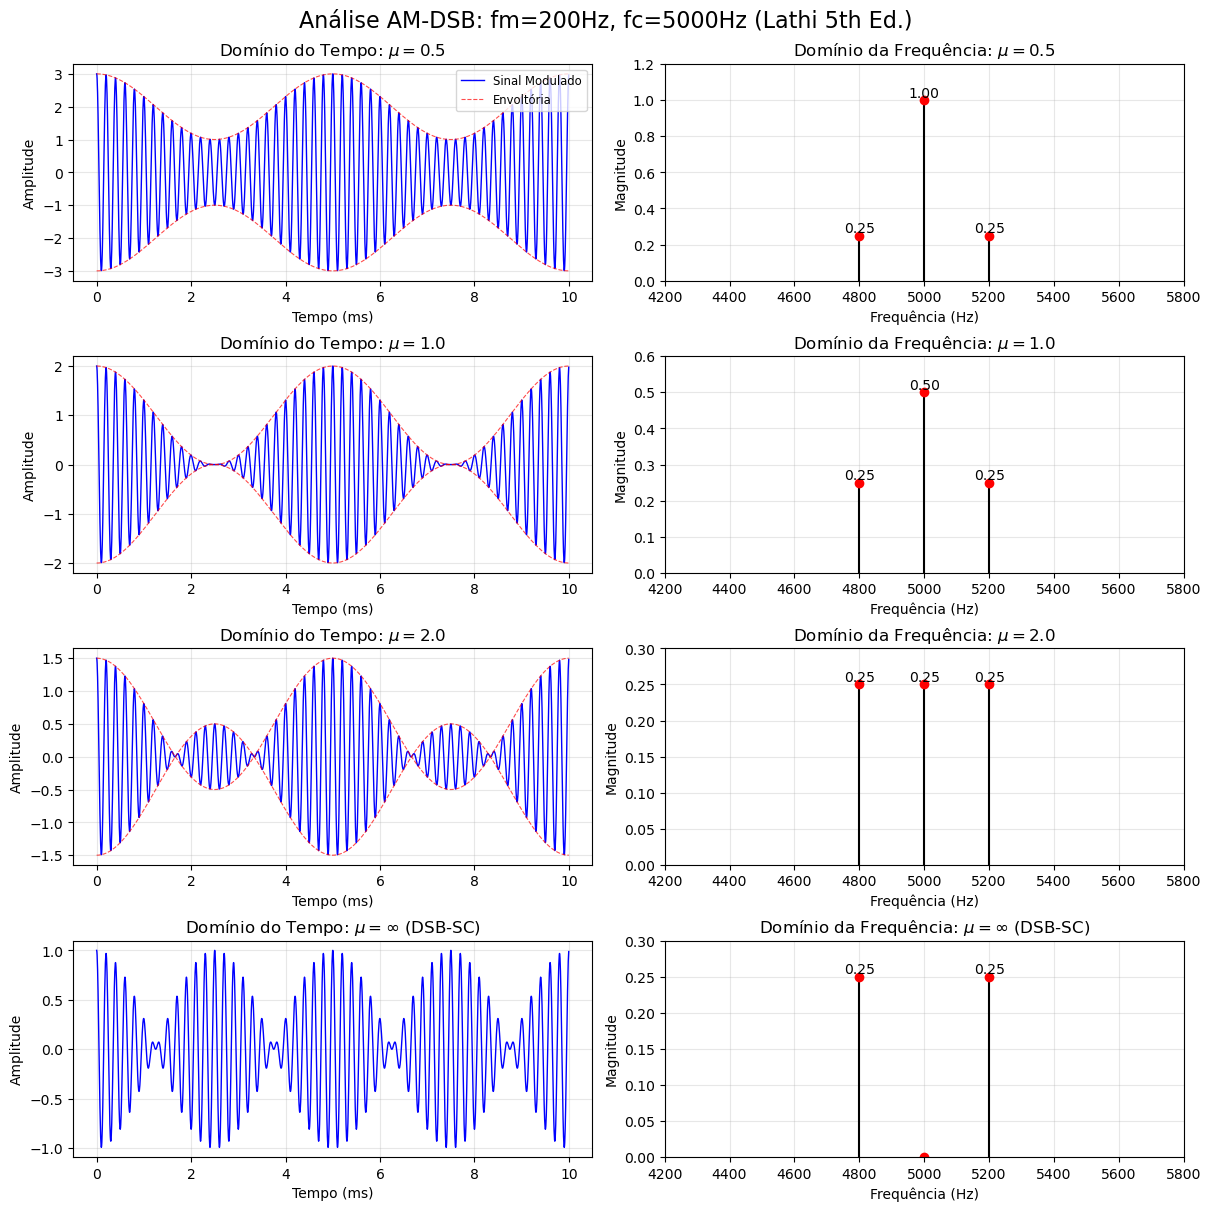

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# --- Configuração dos Parâmetros ---
fm = 200   # Frequência do modulante (Hz)
fc = 5000  # Frequência da portadora (Hz)
fs = 200000 # Frequência de amostragem (alta para boa visualização da portadora)
duration = 0.01 # 10ms (2 períodos do modulante)

t = np.arange(0, duration, 1/fs)
m_t = np.cos(2 * np.pi * fm * t) # Sinal modulante

# Índices de modulação solicitados
mus = [0.5, 1.0, 2.0, np.inf]

# Criar figura
fig, axs = plt.subplots(len(mus), 2, figsize=(12, 12), constrained_layout=True)
fig.suptitle(f'Análise AM-DSB: fm={fm}Hz, fc={fc}Hz (Lathi 5th Ed.)', fontsize=16)

for i, mu in enumerate(mus):
    # 1. Definir Amplitude A baseada em mu
    if mu == np.inf:
        A = 0
        label_mu = r'$\mu = \infty$ (DSB-SC)'
    else:
        A = 1 / mu
        label_mu = f'$\mu = {mu}$'

    # 2. Gerar Sinal Modulado
    # phi(t) = [A + m(t)] * cos(wc*t)
    envelope = A + m_t
    carrier = np.cos(2 * np.pi * fc * t)
    phi_t = envelope * carrier

    # --- Gráfico no TEMPO ---
    ax_time = axs[i, 0]
    ax_time.plot(t * 1000, phi_t, 'b', linewidth=1, label='Sinal Modulado')
    # Plotar a envoltória para referência visual (opcional, mas didático)
    if mu != np.inf:
        ax_time.plot(t * 1000, envelope, 'r--', linewidth=0.8, alpha=0.7, label='Envoltória')
        ax_time.plot(t * 1000, -envelope, 'r--', linewidth=0.8, alpha=0.7)
    
    ax_time.set_title(f'Domínio do Tempo: {label_mu}')
    ax_time.set_xlabel('Tempo (ms)')
    ax_time.set_ylabel('Amplitude')
    ax_time.grid(True, alpha=0.3)
    if i == 0: ax_time.legend(loc='upper right', fontsize='small')

    # --- Gráfico na FREQUÊNCIA (Espectro Conceitual) ---
    # Ao invés de FFT ruidosa, vamos plotar as raias teóricas (stem plot)
    ax_freq = axs[i, 1]
    
    # Frequências: [fc-fm, fc, fc+fm]
    freqs = [fc - fm, fc, fc + fm]
    
    # Amplitudes Espectrais (Conceito Lathi)
    # Portadora: A/2
    # Laterais: 1/4 (Pois m(t) tem amplitude 1)
    amps = [0.25, A/2, 0.25] 
    
    # Cores para distinguir portadora de bandas laterais
    colors = ['g', 'r', 'g'] 
    
    markerline, stemlines, baseline = ax_freq.stem(freqs, amps, basefmt=" ")
    plt.setp(stemlines, 'color', 'k')
    plt.setp(markerline, 'color', 'r') # Marcadores vermelhos
    
    # Ajuste de eixos
    ax_freq.set_xlim(fc - fm*4, fc + fm*4) # Zoom perto de 5kHz
    ax_freq.set_ylim(0, max(amps)*1.2 if max(amps) > 0 else 0.3)
    ax_freq.set_title(f'Domínio da Frequência: {label_mu}')
    ax_freq.set_xlabel('Frequência (Hz)')
    ax_freq.set_ylabel('Magnitude')
    ax_freq.grid(True, alpha=0.3)
    
    # Anotações dos valores
    for f, amp in zip(freqs, amps):
        if amp > 0:
            ax_freq.text(f, amp, f'{amp:.2f}', horizontalalignment='center', verticalalignment='bottom')

plt.show()